# Testing Model with Validation Dataset

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import gzip, pickle

##### Testing the models - Random Forests and Decision Tree - using the validation data.

In [2]:
validation_df = pd.read_csv('../data/validation_modelling.csv')
validation_df.set_index('name', inplace=True)
validation_df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,from_vivino,age,log_price,log_rating_qty,age^2,rating * log_rating_qty
name,,,,,,,,,,,,,,,,
Rivera Salice Salentino 2017,192.0,10.0,30.0,5562.0,0.0,122.0,10.99,3.7,66.0,13.385299,1.0,7.0,2.396986,4.189655,49.0,15.501723
Domaine Des Escaravailles La Ponce Rasteau 2016,174.0,5.0,29.0,2647.0,2.0,122.0,17.25,3.9,280.0,12.697385,1.0,8.0,2.847812,5.634790,64.0,21.975679
Domaine Des Lambrays Clos Des Lambrays Grand Cru 2013,158.0,5.0,26.0,2654.0,0.0,122.0,226.76,4.3,257.0,14.125000,1.0,11.0,5.423892,5.549076,121.0,23.861027
Carta Vieja Merlot 2020,158.0,4.0,33.0,1072.0,0.0,54.0,7.99,3.4,101.0,13.353938,1.0,4.0,2.078191,4.615121,16.0,15.691410
Black Opal Shiraz 2009,201.0,1.0,22.0,587.0,0.0,108.0,8.99,3.4,49.0,12.922992,1.0,15.0,2.196113,3.891820,225.0,13.232189


### Decison Tree Model

In [3]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_dt_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model = p.load()

In [4]:
# Test model on validation dataset 
X = validation_df.drop(columns = ['log_price', 'price', 'age', 'age^2', 'abv', 'from_vivino'])
y = validation_df['log_price']
log_price_pred  = model.predict(X)

mse = mean_squared_error(y, log_price_pred)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred),3)}")

Price USD Root Mean Squared Error (RMSE): 1.591
R-squared score: 0.702


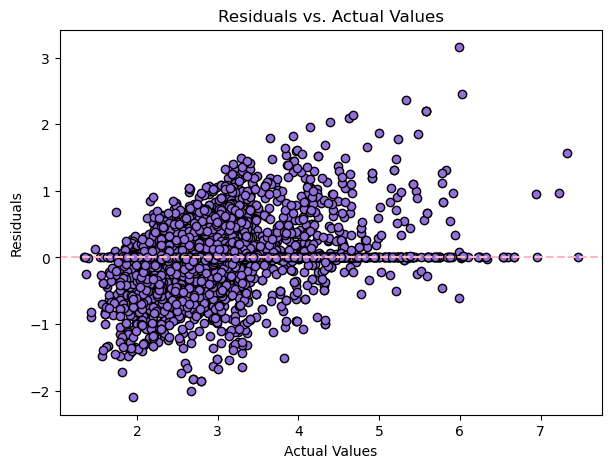

In [5]:
# Plot residuals to check for systematic errors 
residuals = y - log_price_pred
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values');

### Random Forest Model

In [6]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_rf_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model_rf = p.load()

In [7]:
# Test model on validation dataset 
log_price_pred_rf  = model_rf.predict(X)
mse_rf = mean_squared_error(y, log_price_pred_rf)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse_rf)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred_rf),3)}")

Price USD Root Mean Squared Error (RMSE): 1.379
R-squared score: 0.857


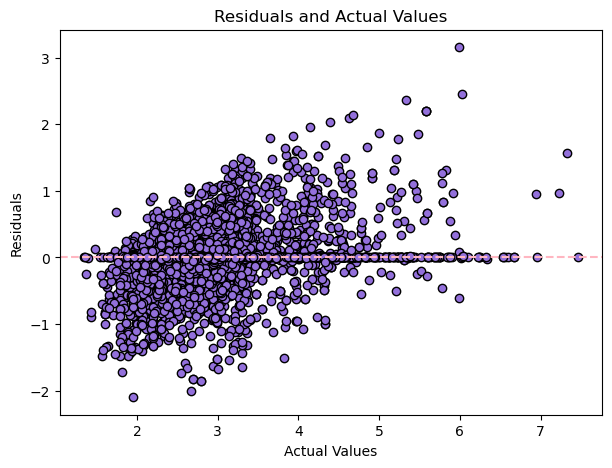

In [8]:
# Plot residuals to check for systematic errors 
residuals_rf = y - log_price_pred_rf
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals and Actual Values');

#### Preparing validation dataframe for use in application.

In [9]:
app_frontend = pd.read_csv('../data/validation_frontend.csv', index_col=0)

In [10]:
def to_normal_case(column_name):
    return ' '.join(word.capitalize() for word in column_name.split('_'))
app_frontend.columns = [to_normal_case(column) for column in app_frontend.columns]
app_frontend.rename(columns = {'Abv': 'ABV', 'Rating': 'Average Rating', 'Price' : 'Price ($)'}, inplace=True)

In [11]:
app_frontend.drop(columns = ['Reviewed By', 'From Vivino', 'Rating Qty', 'Log Rating Qty'], inplace=True)

In [12]:
# Reordering the last two columns
cols = app_frontend.columns.tolist()  # Get the list of all columns
cols[-2], cols[-1] = cols[-1], cols[-2]  # Swap the last two column names
app_frontend = app_frontend[cols]

In [13]:
app_frontend['Wine Variety'] = app_frontend['Wine Variety'].apply(to_normal_case)
app_frontend['Average Rating'] = app_frontend['Average Rating'].apply(lambda x: round(float(x),2))

In [14]:
print(validation_df.shape)
print(app_frontend.shape)

(4333, 16)
(4333, 11)


In [15]:
validation_df.drop(columns = ['price', 'age', 'age^2', 'abv', 'from_vivino']).to_csv('../data/app_backend.csv', index=False)
app_frontend.to_csv('../data/app_frontend.csv', index=True)